### 모터스 고객등급제 개편을 위한 분석 - 3. K-means clustering
--- 
  1) 분석에 필요한 변수들만 추출 
  2) 매출금액에 StandardScaler 적용 
  3) K-means 실행 
--- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes',unicode_minus=False)

In [2]:
## 1. Dataset loading 
df = pd.read_csv('data/dataset_after_log.csv', encoding = 'euc-kr')
print( df.shape )
print( df.columns )
df.head(2)

(8230, 25)
Index(['customer_name', 'hp', 'customer_type', 'gender', 'birth_day',
       'age_on_2023', 'show_room', 'series', 'model', 'model_category',
       'nc_sales', 'service_sales', 'tot_sales', '2023_sf_end', 'sf_due_date',
       'sf_real_end_date', 'sf_early_end_months', 'sf_early_end_yn',
       'nc_purchase_count', 'service_count', 'nps_score', 'nps_category',
       'log_nc_sales', 'log_service_sales', 'log_tot_sales'],
      dtype='object')


,customer_name,hp,customer_type,gender,birth_day,age_on_2023,show_room,series,model,model_category,...,sf_real_end_date,sf_early_end_months,sf_early_end_yn,nc_purchase_count,service_count,nps_score,nps_category,log_nc_sales,log_service_sales,log_tot_sales
0,원종영,010-8837-4492,개인,male,1976-12-22,48.0,천안,5SERIES,520d xDrive,520d,...,NaN,NaN,NaN,1,0,9.0,3.promoter,17.883261,0.000000,17.883261
1,김수미,010-9063-7762,개인,female,1993-09-20,31.0,천안,3SERIES,3GT 20d xDrive LCI,3GT,...,NaN,NaN,NaN,1,1,10.0,3.promoter,17.580255,12.868132,17.582050


In [3]:
## 혹시 몰라서 카피해 둠 ... 
df2 = df.copy()
df2.shape

(8230, 25)

In [4]:
## 3. 변수들에 표준화 적용 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = df2[['log_nc_sales', 'log_service_sales']] 
X_features_scaled = StandardScaler().fit_transform(X_features) 

--- 
### K-means 실행 
- 실루엣 계수는 -1~1 사이의 값을 가지며 1에 가까울 수록 근처 군집과 멀리 떨어져 있음을, 0에 가까울수록 근처 군집과 가까움을 의미
- 각 데이터에 대해 실루엣 계수를 구한 후 평균 ->  일반적으로 이 값이 크면(1에 가까우면) 군집화가 어느정도 잘 되었다고 판단
- 참고문헌 1. https://jominseoo.tistory.com/38 
- 참고문헌 2. https://deepkerry.tistory.com/2
--- 

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df2['cluster_label'] = labels

y2 = silhouette_score(X_features_scaled, labels)
print('- K=2일때 silhouette_score = {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

- K=2일때 silhouette_score = 0.524


In [6]:
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df2['cluster_label'] = labels

y3 = silhouette_score(X_features_scaled, labels)
print('- K=3일때 silhouette_score = {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

- K=3일때 silhouette_score = 0.573


In [7]:
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df2['cluster_label'] = labels

y4 = silhouette_score(X_features_scaled, labels)
print('- K=4일때 silhouette_score = {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

- K=4일때 silhouette_score = 0.609


In [8]:
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df2['cluster_label'] = labels

y5 = silhouette_score(X_features_scaled, labels)
print('- K=5일때 silhouette_score = {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

- K=5일때 silhouette_score = 0.605


In [9]:
kmeans = KMeans(n_clusters=6, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df2['cluster_label'] = labels

y6 = silhouette_score(X_features_scaled, labels)
print('- K=6일때 silhouette_score = {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

- K=6일때 silhouette_score = 0.595


In [10]:
kmeans = KMeans(n_clusters=7, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df2['cluster_label'] = labels

y7 = silhouette_score(X_features_scaled, labels)
print('- K=7일때 silhouette_score = {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

- K=7일때 silhouette_score = 0.541


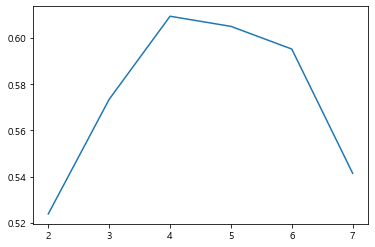

In [11]:
x = np.arange(2,8)
y = [y2, y3, y4, y5, y6, y7]

plt.plot(x,y)
plt.show()

- k=4일때의 군집화가 효율적인 것으로 보인다. 
--- 
#### K-means 군집화 결과 평가 

In [12]:
#군집 개수별로 군집화 구성을 시각화 하는 함수
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

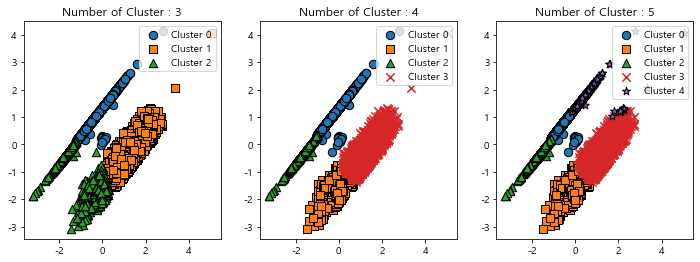

In [13]:
# 군집 개수를 3~5개까지 변화시켜가며 군집화 구성 시각화
visualize_kmeans_plot_multi([3,4,5], X_features_scaled)

In [14]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features):     
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
   
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
   
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
   
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
       
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
       
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
       
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
       
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
           
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
           
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

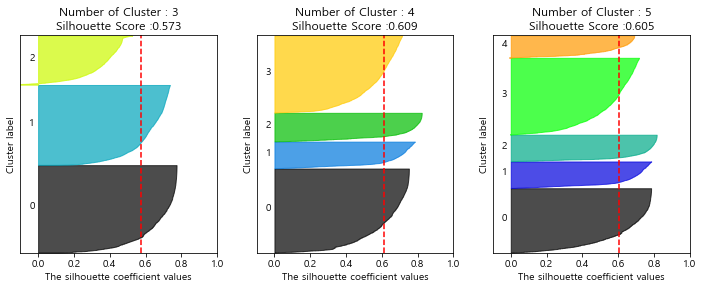

In [15]:
visualize_silhouette([3,4,5], X_features_scaled)

- 군집별로 비교적 고르게 구분된 k=4이 적당해 보인다. (붉은선 우측의 면적이 집단별로 가장 비슷 함)

In [16]:
## k=4로 군집화된 데이터 내보내기 
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df2['cluster_label'] = labels

df2.to_csv('data/output.csv', index=False, encoding = 'euc-kr')

--- 
#### comments 
- 만족스럽지는 않지만, nc_sales와 service_sales 만으로도 4개 그룹으로 군집화가 되었다. 
- 매출금액과는 다른 속성의 변수, 예를 들어 BDC call 응답율 데이터가 추가된다면 보다 나은 군집화가 가능하지 않을까? 
- 다음 스텝으로는 구분된 4개 그룹별로 성/연령/시리즈/평균 매출액 등을 비교하여, 차별점을 찾아보자. 
--- 